<a href="https://colab.research.google.com/github/MelikbekyanAshot/Data-Science/blob/main/Digit%20Recognition/DigitRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Импорт бибилотек

In [ ]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt


Загрузка данных

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Kaggle/Digit Recognition/train.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Обработка данных

In [ ]:
features = train.drop(labels='label', axis=1).values / 255
target = train.label.values
features_train, features_test, target_train, target_test = train_test_split(features,
                                                                              target,
                                                                              test_size = 0.2,
                                                                              random_state = 42)

features_train = torch.from_numpy(features_train)
target_train = torch.from_numpy(target_train).type(torch.LongTensor) 

features_test = torch.from_numpy(features_test)
target_test = torch.from_numpy(target_test).type(torch.LongTensor)  

Визуализация

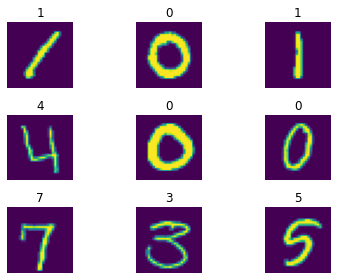

In [ ]:
fig, ax = plt.subplots(3, 3)
k = 0
for i in range(3):
  for j in range(3):
    ax[i, j].imshow(features[k].reshape(28,28))
    ax[i, j].axis("off")
    ax[i, j].title.set_text(str(target[k]))
    k += 1
fig.tight_layout()
plt.show()

Нейронная сеть

In [ ]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    
    # Convolution 1
    self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=0)
    self.relu1 = nn.ReLU()
    
    # Max pool 1
    self.maxpool1 = nn.MaxPool2d(kernel_size=2)

    # Convolution 2
    self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=0)
    self.relu2 = nn.ReLU()
    
    # Max pool 2
    self.maxpool2 = nn.MaxPool2d(kernel_size=2)
    
    # Fully connected 1
    self.fc1 = nn.Linear(32 * 4 * 4, 10)

  def forward(self, x):

    # Convolution 1
    out = self.cnn1(x)
    out = self.relu1(out)
    
    # Max pool 1
    out = self.maxpool1(out)
    
    # Convolution 2 
    out = self.cnn2(out)
    out = self.relu2(out)
    
    # Max pool 2 
    out = self.maxpool2(out)
    
    # flatten
    out = out.view(out.size(0), -1)

    # Linear function (readout)
    out = self.fc1(out)
    
    return out

  def train(self, train_loader, test_loader, error, learning_rate, batch_size, num_epochs):

    for epoch in range(num_epochs):
      for images, labels in train_loader: 
        features = Variable(images.view(batch_size, 1, 28, 28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(features.float())
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
      # Calculate Accuracy         
      correct = 0
      total = 0
      # Iterate through test dataset
      for images, labels in test_loader:
        test = Variable(images.view(-1,1,28,28))
        
        # Forward propagation
        outputs = model(test.float())
        
        # Get predictions from the maximum value
        predicted = torch.max(outputs.data, 1)[1]
        
        # Total number of labels
        total += len(labels)
        
        correct += (predicted == labels).sum()
        
      accuracy = 100 * correct / float(total)

      # Print Loss
      print('Epoch: {}  Loss: {}  Accuracy: {} %'.format(epoch + 1, loss.data, accuracy))

  def predict(self, data_loader):
    predictions = []
    for images in pred_loader.dataset:
      pred = Variable(images[0].view(-1, 1,28,28))
      outputs = model(pred.float())
      predicted = torch.max(outputs.data, 1)[1]
      predictions.append(predicted.item())
    return predictions


Гиперпараметры

In [ ]:
batch_size = 200
n_iters = 20000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

Перевод в DataLoader

In [ ]:
train = torch.utils.data.TensorDataset(features_train, target_train)
test = torch.utils.data.TensorDataset(features_test, target_test)

train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

In [ ]:
# Create CNN
model = CNN()

# Cross Entropy Loss 
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
model.train(train_loader, test_loader, error, learning_rate, batch_size, num_epochs)

Epoch: 1  Loss: 0.09219211339950562  Accuracy: 94.41666412353516 %
Epoch: 2  Loss: 0.047961849719285965  Accuracy: 96.03571319580078 %
Epoch: 3  Loss: 0.034134767949581146  Accuracy: 96.61904907226562 %
Epoch: 4  Loss: 0.027493739500641823  Accuracy: 97.04762268066406 %
Epoch: 5  Loss: 0.023518703877925873  Accuracy: 97.35713958740234 %
Epoch: 6  Loss: 0.02049417793750763  Accuracy: 97.44047546386719 %
Epoch: 7  Loss: 0.018056852743029594  Accuracy: 97.52381134033203 %
Epoch: 8  Loss: 0.016933681443333626  Accuracy: 97.64286041259766 %
Epoch: 9  Loss: 0.014787337742745876  Accuracy: 97.72618865966797 %
Epoch: 10  Loss: 0.013884013518691063  Accuracy: 97.78571319580078 %
Epoch: 11  Loss: 0.012759468518197536  Accuracy: 97.83333587646484 %
Epoch: 12  Loss: 0.011753485538065434  Accuracy: 97.89286041259766 %
Epoch: 13  Loss: 0.010526856407523155  Accuracy: 97.96428680419922 %
Epoch: 14  Loss: 0.00996793806552887  Accuracy: 98.07142639160156 %
Epoch: 15  Loss: 0.009452048689126968  Accurac

Сохранение модели

In [ ]:
torch.save(model, '/content/drive/MyDrive/Kaggle/Digit Recognition/model.pt')

Загрузка модели

In [ ]:
model = torch.load('/content/drive/MyDrive/Kaggle/Digit Recognition/model.pt')

Предсказание


In [ ]:
pred = pd.read_csv('/content/drive/MyDrive/Kaggle/Digit Recognition/test.csv')
pred.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
pred_np = torch.from_numpy(pred.values / 255)
pred_set = torch.utils.data.TensorDataset(pred_np)
pred_loader = DataLoader(pred_set, batch_size = batch_size, shuffle = False)

In [ ]:
predictions = model.predict(pred_loader)

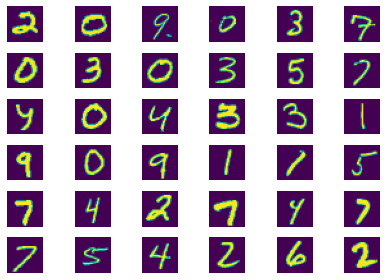

In [ ]:
fig, ax = plt.subplots(6, 6)
k = 0
for i in range(6):
  for j in range(6):
    ax[i, j].imshow(pred.loc[k].values.reshape(28,28))
    ax[i, j].axis("off")
    k += 1
fig.tight_layout()
plt.show()

Сохранение в файл

In [ ]:
submission = pd.DataFrame()
submission['ImageID'] = range(1, len(predictions)+1) 
submission['Label'] = predictions
submission = submission.set_index('ImageID')
submission.to_csv("submission.csv")

In [ ]:
submission

,Label
ImageID,
1,2
2,0
3,9
4,9
5,3
...,...
27996,9
27997,7
27998,3
